In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tabulate import tabulate

# first checking terminal to mid-sequence distance

(-1.16362197756172, 97.3306920342952)

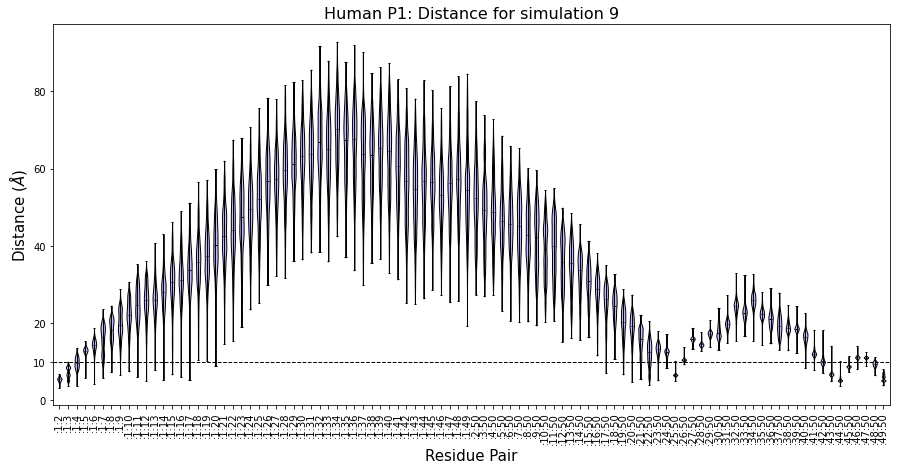

In [3]:
simulation=9
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_terminal_all_dist.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.iloc[:,2:].copy()
#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1.iloc[:,2:].columns:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ordered_labels=[]
for residue_pair in labels:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    if second-first>=0:
        ordered_labels.append(residue_pair)
    elif second-first<0:
        ordered_labels.append(':'+str(second)+':'+str(first))
labels=ordered_labels
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=10,linewidth = 1, color='black',linestyle='dashed',label='10')
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


# NEXT checking pairwise residues between all residues involved in hairpin loop (identified from previous section)


# ordered by increasing distance between residue indices, with at least 9 residues between them (i.e. less than 9 were dropped from diagram) and MEAN less than the cutoff shown with dotted lines

(2.24396928788666, 24.475379787394026)

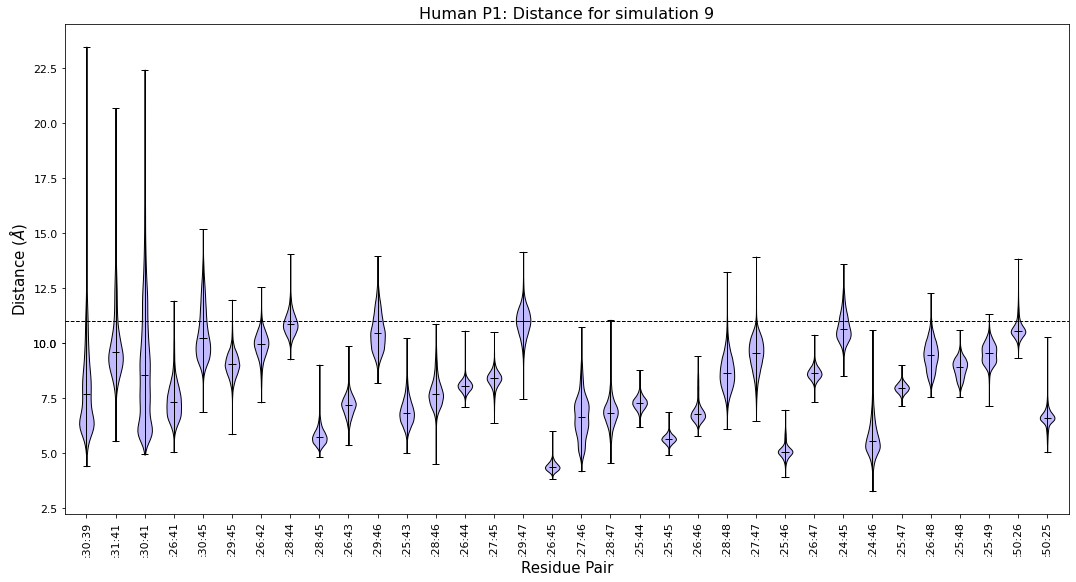

In [4]:
simulation=9
distance_cutoff=11
cutoff_diff_between_residue_pair_indices=9
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=11,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=11)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(18, 9))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_res_hairpin.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]
for residue_pair in temp_p1.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    if abs(second-first)==1:
        temp_p1.drop(residue_pair,axis=1,inplace=True)

temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].mean().sort_values()<distance_cutoff].index        
temp_p1_onlydis_diff=[]
temp_p1_onlydis_mindiff=[]
for residue_pair in temp_p1_onlydis:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    temp_p1_onlydis_diff.append([abs(first-second),':'+str(first)+':'+str(second)])
temp_p1_onlydis_diff=sorted(temp_p1_onlydis_diff,key=lambda x:x[0])
temp_p1_onlydis_diff=[pair for pair in temp_p1_onlydis_diff if pair[0]>=cutoff_diff_between_residue_pair_indices]
for residue_pair in temp_p1_onlydis_diff:
    temp_p1_onlydis_mindiff.append(residue_pair[1])
temp_p1_onlydis=temp_p1_onlydis_mindiff

#temp_p1_onlydis=temp_p1.iloc[:,2:].copy()
#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))

ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
#plt.axhline(y=10,linewidth = 1, color='black',linestyle='dashed',label='10')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=11)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


# atom analysis for simulation 9

(1.2700997415219344, 8.579135023614805)

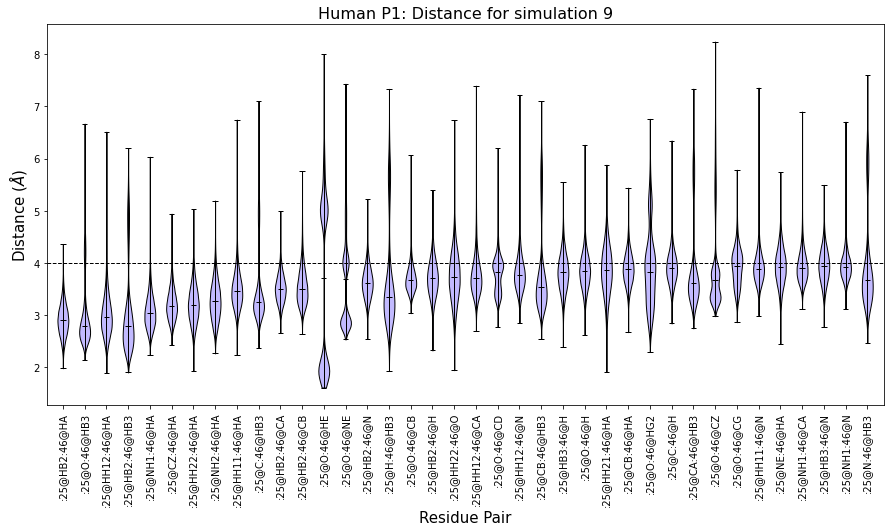

In [19]:
simulation=9
distance_cutoff=4
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_atom_res25-46.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.copy()
temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].median().sort_values()<distance_cutoff].index        

#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


(1.164639391905978, 12.395639508035845)

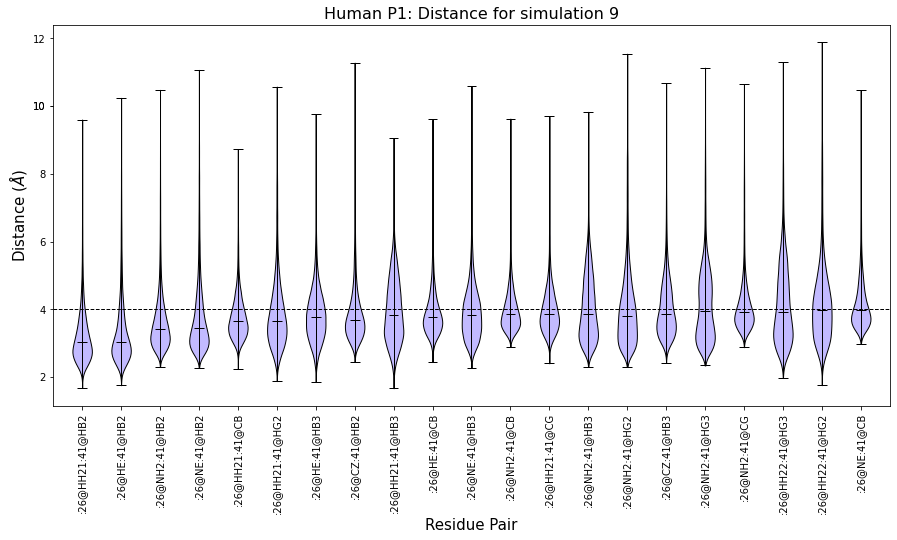

In [18]:

simulation=9
distance_cutoff=4
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_atom_res26-41.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.copy()
temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].median().sort_values()<distance_cutoff].index        

#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


(1.1894902461814667, 9.324941594764066)

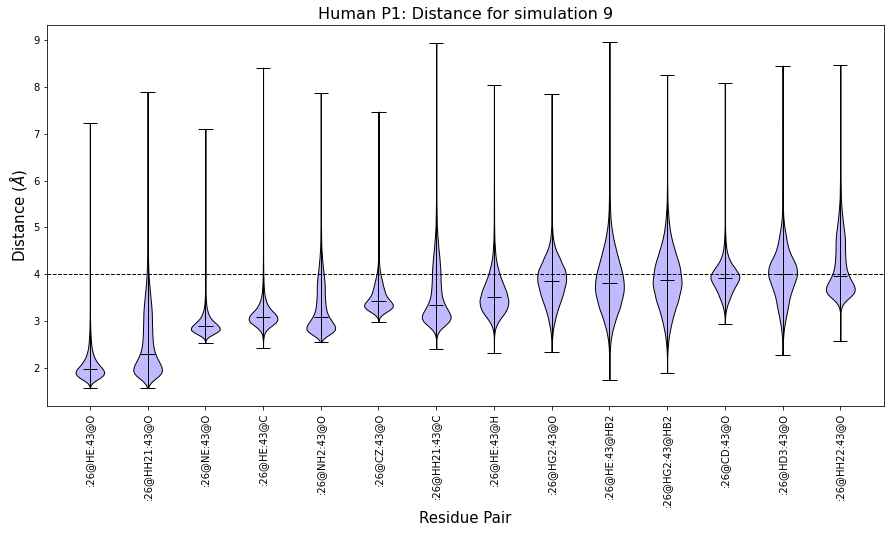

In [20]:

simulation=9
distance_cutoff=4
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_atom_res26-43.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.copy()
temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].median().sort_values()<distance_cutoff].index        

#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


(1.37283841699757, 8.7301473423525)

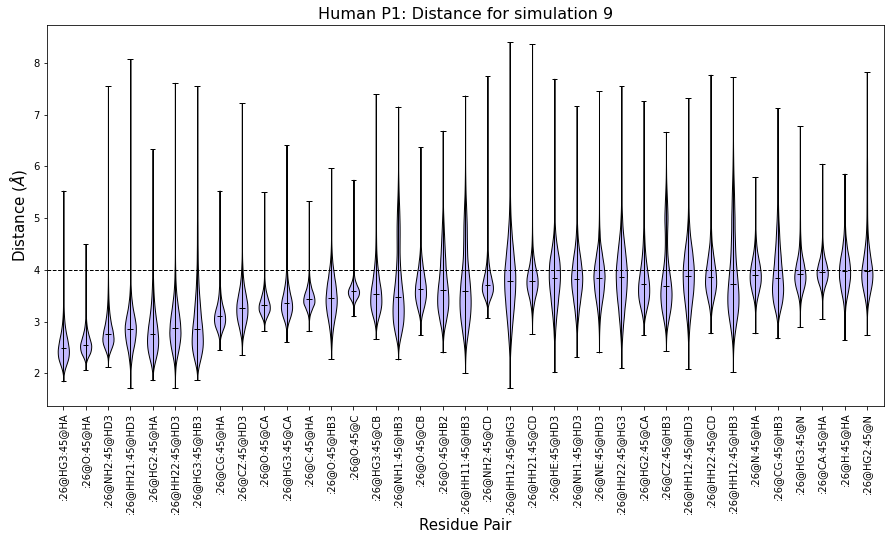

In [21]:


simulation=9
distance_cutoff=4
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_atom_res26-45.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.copy()
temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].median().sort_values()<distance_cutoff].index        

#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')


(1.049407242584884, 11.560942693430752)

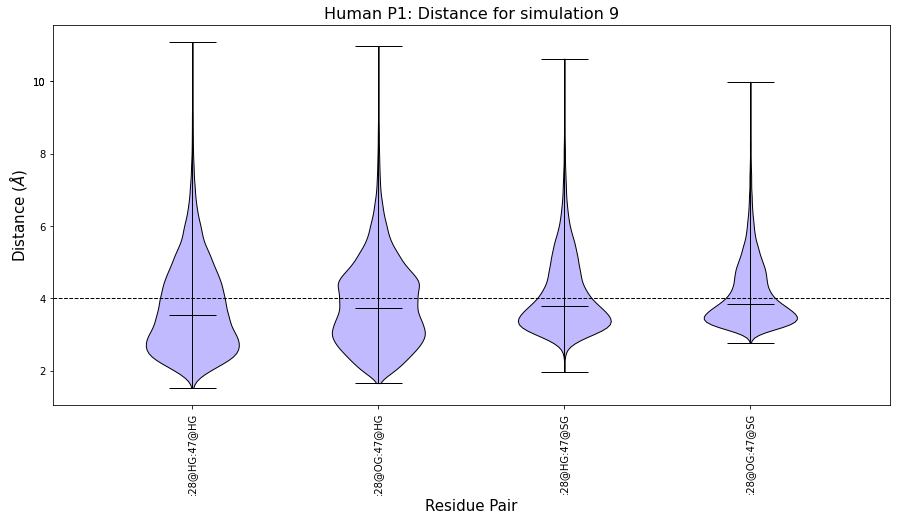

In [22]:

simulation=9
distance_cutoff=4
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize=10,rotation=90)
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Residue Pair', fontsize=15)
data = []
labels=[]
fig,ax = plt.subplots(figsize=(15, 7))
temp_p1=pd.read_csv("p1_sim9_trajectory_pairwise_atom_res28-47.csv")
blank_df = pd.DataFrame()
for sim in temp_p1.sim.unique():
    temp_df = temp_p1[temp_p1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1 = blank_df.copy()
del temp_df
del blank_df
temp_p1=temp_p1[temp_p1.sim!=13]
temp_p1=temp_p1[temp_p1.sim!=15]

temp_p1_onlydis=temp_p1.copy()
temp_p1_onlydis=temp_p1.iloc[:,
                                     2:].mean().sort_values()[temp_p1.iloc[:,
                                                                               2:].median().sort_values()<distance_cutoff].index        

#temp_p1_onlydis=temp_p1_onlydis.reindex(temp_p1_onlydis.mean().sort_values().index,axis=1)
#temp_p1=pd.concat([temp_p1.iloc[:,:3],temp_p1_onlydis],axis=1)
for pair in temp_p1_onlydis:
    data.append(list(temp_p1[temp_p1.sim==simulation][pair].values))
    labels.append(str(pair))
ax.set_title('Human P1: Distance for '+'simulation '+str(simulation),
             fontsize=16)
ax.set_ylabel('Distance'+' ('+r'$\AA$'+')',fontsize=15)
#ax.set_ylim(11,37)
#ax.violinplot(data)
parts = ax.violinplot(data, showmeans=False, showmedians=True,
        showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('#c2baff')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cmaxes'].set_linewidth(1)
set_axis_style(ax,labels)
#plt.axvline(x=1.5,linewidth = 1, color='black',linestyle='dashed')
plt.axhline(y=distance_cutoff,linewidth = 1, color='black',linestyle='dashed',label=str(distance_cutoff))
#ax.annotate('10 Angstrom',xy=(2,10),fontsize=20)
#plt.xticks(np.arange(0,20,10)+)
extraticks=[10]
lim = ax.get_ylim()
#ax.text(.145,.95,'p1 P1',fontsize=10,
#        horizontalalignment='center',
#        transform=ax.transAxes)
ax.set_yticks(list(ax.get_yticks()) + extraticks)
plt.setp(ax.get_yticklabels(),fontsize=10)
ax.set_ylim(lim)
#del temp_p1, temp_p1_onlydis
#fig.savefig('figures_for_publication/p1_cys_tyr_pairwise_distance_all_sims.png',dpi=400,bbox_inches='tight')
